In [1]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import imgaug.augmenters as iaa
from skimage import io
from tensorflow.keras.optimizers import Adam

In [2]:
import os

root=r'C:\Users\harsh\Desktop\Gray_scale'

for i in range(0,16):
    os.mkdir(os.path.join(root, f'signature_{i+1}'))


In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

data_dir = r'C:\Users\harsh\Desktop\Handwritten Signature Data\Data'

def rename_folders(data_dir):
    for root, dirs, files in os.walk(data_dir):
        for i, directory in enumerate(dirs):
            old_dir_path = os.path.join(root, directory)
            new_dir_path = os.path.join(root, f'subject_{i+1}')
            os.rename(old_dir_path, new_dir_path)

            for j, file_name in enumerate(os.listdir(new_dir_path)):
                old_file_path = os.path.join(new_dir_path, file_name)
                new_file_name = f'signature_{j+1}.jpg'
                new_file_path = os.path.join(new_dir_path, new_file_name)
                os.rename(old_file_path, new_file_path)
                # cv2.imread(new_file_path, cv2.IMREAD_GRAYSCALE)
print(rename_folders(data_dir))

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\harsh\\Desktop\\Handwritten Signature Data\\Data\\subject_1\\signature_10.jpg' -> 'C:\\Users\\harsh\\Desktop\\Handwritten Signature Data\\Data\\subject_1\\signature_2.jpg'

In [6]:
import imgaug.augmenters as iaa
import imgaug.augmenters.flip as flip

def load_and_augment_data(folder_path, num_augmentations=20):
    # Initialize the augmenter
    augmenter = iaa.Sequential([
        iaa.Affine(rotate=(-25, 25), scale=(0.8, 1.2)),
        flip.Fliplr(p=0.5)
    ])
    
    # Load the data from the folder
    X = []
    y = []
    classes = os.listdir(folder_path)
    for i, cls in enumerate(classes):
        cls_path = os.path.join(folder_path, cls)
        images = os.listdir(cls_path)
        for img in images:
            img_path = os.path.join(cls_path, img)
            # Load the image
            image = io.imread(img_path)
            # Apply the augmentation and save the new images
            for j in range(num_augmentations):
                aug_image = augmenter.augment_image(image)
                X.append(aug_image)
                y.append(i)
    
    # Convert to numpy arrays
    X = np.array(X)
    y = np.array(y)
    
    # Shuffle the data
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]
    
    return X, y



In [7]:
# Code for Gray scale
import os
import cv2 as cv2

import cv2
# from google.colab.patches import cv2_imshow 

directory = r"C:\Users\harsh\Desktop\Handwritten Signature Data\Data"


# gray_path= '/content/drive/MyDrive/Colab Notebooks/PROJECT codes/DATASET/Data_Augmentation'
gray_path= r'C:\Users\Harsh\Desktop\gray_scale'
def gray(directory):
  for root, dirs, files in os.walk(directory):
      for i, directory in enumerate(dirs): 
        print(i+1,directory)
        # print(gray_path,i)
        old_dir= os.path.join(root,directory)
       
        old_gray= os.path.join (gray_path,f'signature_{i+1}')
        # print(old_dir)
        print(old_gray)
        # new_dir= os.path.join(old_dir,f'signature_{i+1}')
        # print(new_dir)
        for j,file_name in enumerate((os.listdir(old_dir))):
            # print(j+1,file_name)
            # new_dir= os.path.join(old_dir,f'signature_{i+1}_{j+1}.jpg')
            # new_gray = os.path.join(old_gray,f'signature_{j+1}.jpg')
            # print(new_dir)
            # print(new_gray)
            filename= f'signature_{j+1}.jpg'
            # print(filename)
            img =  cv2.imread((os.path.join(old_dir,filename))) #image read for gray scale 
        
          
            
            gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
            cv2.imwrite((os.path.join(old_gray,f'signature_{j+1}.jpg')),gray)
            # cv2_imshow(gray)
            # cv2.waitKey(0)
        

gray(directory)

1 subject_1
C:\Users\Harsh\Desktop\gray_scale\signature_1
2 subject_10
C:\Users\Harsh\Desktop\gray_scale\signature_2
3 subject_11
C:\Users\Harsh\Desktop\gray_scale\signature_3
4 subject_12
C:\Users\Harsh\Desktop\gray_scale\signature_4
5 subject_13
C:\Users\Harsh\Desktop\gray_scale\signature_5
6 subject_14
C:\Users\Harsh\Desktop\gray_scale\signature_6
7 subject_15
C:\Users\Harsh\Desktop\gray_scale\signature_7
8 subject_16
C:\Users\Harsh\Desktop\gray_scale\signature_8
9 subject_2
C:\Users\Harsh\Desktop\gray_scale\signature_9
10 subject_3
C:\Users\Harsh\Desktop\gray_scale\signature_10
11 subject_4
C:\Users\Harsh\Desktop\gray_scale\signature_11
12 subject_5
C:\Users\Harsh\Desktop\gray_scale\signature_12
13 subject_6
C:\Users\Harsh\Desktop\gray_scale\signature_13
14 subject_7
C:\Users\Harsh\Desktop\gray_scale\signature_14
15 subject_8
C:\Users\Harsh\Desktop\gray_scale\signature_15
16 subject_9
C:\Users\Harsh\Desktop\gray_scale\signature_16


In [8]:
# from google.colab import drive
# drive.mount('/content/drive')


In [9]:
import Augmentor

# /content/drive/MyDrive/Colab Notebooks/PROJECT codes/DATASET/Gray_scale

# p = Augmentor.Pipeline('/content/drive/MyDrive/Colab Notebooks/PROJECT codes/DATASET/Hand_Sign_Data')

p = Augmentor.Pipeline(r'C:\Users\harsh\Desktop\Gray_scale')  # gray image source path

Initialised with 159 image(s) found.
Output directory set to C:\Users\harsh\Desktop\Gray_scale\output.

In [10]:
p.rotate(probability = 0.7,max_left_rotation=10,max_right_rotation=10)

p.rotate(probability=1, max_left_rotation=5, max_right_rotation=5)

p.rotate270(probability=0.5)

p.flip_left_right(probability=0.5)

p.flip_top_bottom(probability=0.5)

p.zoom_random(probability=0.5, percentage_area=0.8)

# p.zoom(probability=0.3,min_factor=1.1,max_factor=1.6)

p.skew_left_right(0.5,0.3)

p.skew_top_bottom(0.5,0.5)
p.resize(1,519,276)
p.random_distortion(0.5,4,6,5) #probability, grid width, height,magnitude
p.shear(1,10,11) # prob, max_shear_left, max_shear_right


In [11]:
p.sample(1600)

Processing <PIL.Image.Image image mode=L size=519x276 at 0x1DED21D4290>: 100%|██████████| 1600/1600 [00:05<00:00, 309.02 Samples/s] 


In [12]:
# To rename Augmented Data

data_dir = r'C:\Users\harsh\Desktop\Gray_scale\output'

def rename_folders(data_dir):
    for root, dirs, files in os.walk(data_dir):
        for i, directory in enumerate(dirs):
            old_dir_path = os.path.join(root, directory)
            new_dir_path = os.path.join(root, f'subject_{i+1}')
            os.rename(old_dir_path, new_dir_path)

            for j, file_name in enumerate(os.listdir(new_dir_path)):
                old_file_path = os.path.join(new_dir_path, file_name)
                new_file_name = f'signature_{j+1}.jpg'
                new_file_path = os.path.join(new_dir_path, new_file_name)
                os.rename(old_file_path, new_file_path)
                # cv2.imread(new_file_path, cv2.IMREAD_GRAYSCALE)
print(rename_folders(data_dir))

None


In [13]:
import splitfolders
input_folder = r"C:\Users\harsh\Desktop\Gray_scale\output"
splitfolders.ratio (input_folder, output=r"C:\Users\harsh\Desktop\Handwritten Signature Data\splitted_gray_data_75_25",
                seed=42, ratio=(.75,.25),
                group_prefix=None)

Copying files: 1600 files [00:05, 303.30 files/s]


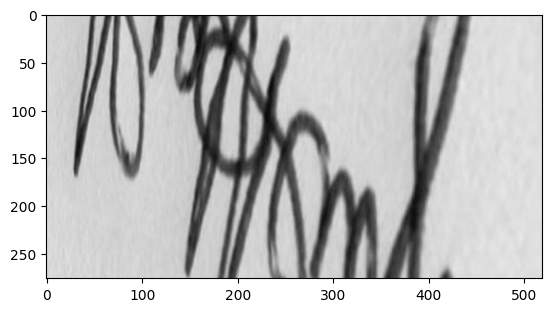

In [14]:
import keras.utils as image
import matplotlib.pyplot as plt
img = image.load_img(r'C:\Users\harsh\Desktop\Handwritten Signature Data\splitted_gray_data_75_25\train\subject_1\signature_11.jpg')
plt.imshow(img)
# print(img.shape)

In [15]:
print(cv2.imread(r'C:\Users\harsh\Desktop\Handwritten Signature Data\splitted_gray_data_75_25\train\subject_1\signature_11.jpg').shape)
cv2.imread(r'C:\Users\harsh\Desktop\Handwritten Signature Data\splitted_gray_data_75_25\train\subject_1\signature_11.jpg')

(276, 519, 3)


array([[[201, 201, 201],
        [203, 203, 203],
        [207, 207, 207],
        ...,
        [217, 217, 217],
        [216, 216, 216],
        [214, 214, 214]],

       [[203, 203, 203],
        [205, 205, 205],
        [208, 208, 208],
        ...,
        [217, 217, 217],
        [216, 216, 216],
        [215, 215, 215]],

       [[205, 205, 205],
        [207, 207, 207],
        [209, 209, 209],
        ...,
        [218, 218, 218],
        [216, 216, 216],
        [215, 215, 215]],

       ...,

       [[217, 217, 217],
        [216, 216, 216],
        [215, 215, 215],
        ...,
        [222, 222, 222],
        [222, 222, 222],
        [223, 223, 223]],

       [[218, 218, 218],
        [216, 216, 216],
        [216, 216, 216],
        ...,
        [222, 222, 222],
        [222, 222, 222],
        [222, 222, 222]],

       [[219, 219, 219],
        [217, 217, 217],
        [216, 216, 216],
        ...,
        [221, 221, 221],
        [222, 222, 222],
        [222, 222, 222]]

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
#RUN FROM HERE

batch_size=50 #20  #15

train_datagen = ImageDataGenerator(rescale= 1./255,)

test_datagen= ImageDataGenerator(rescale=1./255)


In [18]:
train_generator=train_datagen.flow_from_directory('C://Users//harsh//Desktop//Handwritten Signature Data//splitted_gray_data_75_25//train', # "train folder location"
    target_size=(519,276),
    batch_size=batch_size,color_mode='grayscale',
    classes = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15','subject_16'],
    # classes = ['faculty_1','faculty_2','faculty_3','faculty_4','faculty_5','faculty_6','faculty_7','faculty_8','faculty_9','faculty_10','faculty_11','faculty_12','faculty_13','faculty_14','faculty_15','faculty_16'],
    class_mode='categorical'
)

# same generator for validation data

validation_generator=test_datagen.flow_from_directory("C://Users//harsh//Desktop//Handwritten Signature Data//splitted_gray_data_75_25//val",           #"validation image folder new loaction"
    target_size=(519,276),
    batch_size=batch_size,color_mode='grayscale',
    
    classes = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15','subject_16'],
    # classes = ['faculty_1','faculty_2','faculty_3','faculty_4','faculty_5','faculty_6','faculty_7','faculty_8','faculty_9','faculty_10','faculty_11','faculty_12','faculty_13','faculty_14','faculty_15','faculty_16'],
    class_mode='categorical'
)

Found 1194 images belonging to 16 classes.
Found 406 images belonging to 16 classes.


In [19]:
batch_size=50

train_datagen = ImageDataGenerator(rescale= 1./255,)

test_datagen= ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory('C://Users//harsh//Desktop//Handwritten Signature Data//splitted_gray_data_75_25//train', # "train folder location"
    target_size=(519,276),
    batch_size=batch_size,color_mode='grayscale',
    classes = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15','subject_16'],
    class_mode='categorical'
)

# same generator for validation data
validation_generator=test_datagen.flow_from_directory("C://Users//harsh//Desktop//Handwritten Signature Data//splitted_gray_data_75_25//val",           #"validation image folder new loaction"
    target_size=(519,276),
    batch_size=batch_size,color_mode='grayscale',
    classes = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15','subject_16'],
    class_mode='categorical'
)

num_samples = len(train_generator)
X_train = []
y_train = []
for i in range(num_samples):
    x_batch, y_batch = next(train_generator)
    X_train.append(x_batch)
    y_train.append(y_batch)

# Concatenate the batches to obtain the full x_train and y_train
X_train = np.concatenate(X_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

num_samples = len(validation_generator)
x_val = []
y_val = []
for i in range(num_samples):
    x_batch, y_batch = next(validation_generator)
    x_val.append(x_batch)
    y_val.append(y_batch)

# Concatenate the batches to obtain the full x_train and y_train
x_val = np.concatenate(x_val, axis=0)
y_val = np.concatenate(y_val, axis=0)

Found 1194 images belonging to 16 classes.
Found 406 images belonging to 16 classes.


# 25 EPOCH

In [20]:
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(16, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 25
batch_size = 42

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))


Epoch 1/25
29/29 [==============================] - 4s 104ms/step - loss: 2.8658 - accuracy: 0.0637 - val_loss: 2.8201 - val_accuracy: 0.0788
Epoch 2/25
29/29 [==============================] - 3s 99ms/step - loss: 2.8045 - accuracy: 0.0695 - val_loss: 2.7928 - val_accuracy: 0.0837
Epoch 3/25
29/29 [==============================] - 3s 101ms/step - loss: 2.7824 - accuracy: 0.0787 - val_loss: 2.7691 - val_accuracy: 0.0640
Epoch 4/25
29/29 [==============================] - 3s 98ms/step - loss: 2.7492 - accuracy: 0.0921 - val_loss: 2.8370 - val_accuracy: 0.0764
Epoch 5/25
29/29 [==============================] - 3s 104ms/step - loss: 2.7578 - accuracy: 0.0972 - val_loss: 2.7816 - val_accuracy: 0.0985
Epoch 6/25
29/29 [==============================] - 3s 100ms/step - loss: 2.7487 - accuracy: 0.0972 - val_loss: 2.7747 - val_accuracy: 0.0788
Epoch 7/25
29/29 [==============================] - 3s 103ms/step - loss: 2.7620 - accuracy: 0.0938 - val_loss: 2.7952 - val_accuracy: 0.0813
Epoch 8/

In [21]:
# Evaluate the RNN model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the RNN model
predictions = model.predict(x_val)

13/13 [==============================] - 1s 36ms/step - loss: 2.7362 - accuracy: 0.0911
Test Loss: 2.736177444458008
Test Accuracy: 0.0911330059170723
13/13 [==============================] - 1s 36ms/step


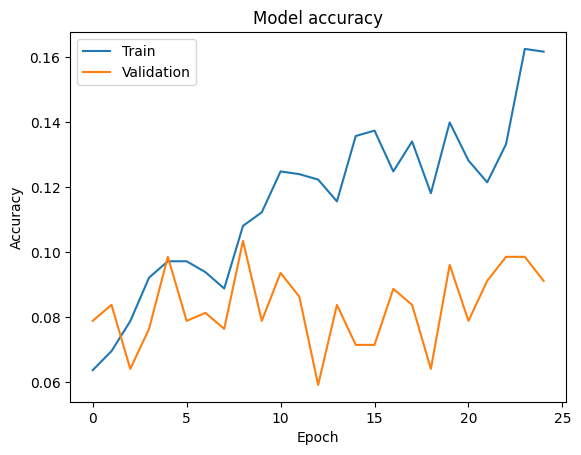

In [22]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


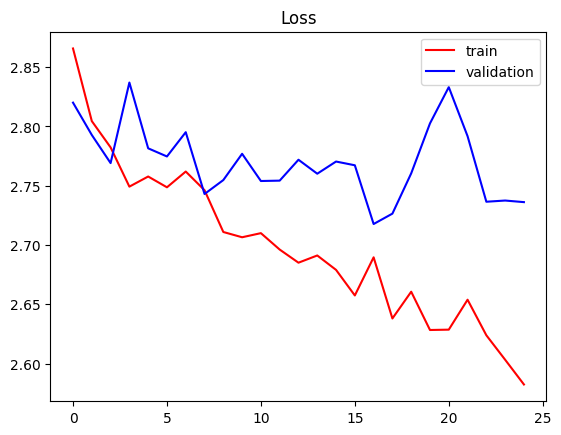

In [23]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

In [24]:
# Generate confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

13/13 [==============================] - 0s 35ms/step
Confusion Matrix:
[[ 0  7  1  2  0  0  1  0  0 11  1  1  1  0  0  0]
 [ 0  8  0  7  0  0  0  0  0 12  0  0  2  0  0  0]
 [ 0 13  0  8  0  0  1  0  0  6  0  1  0  0  0  0]
 [ 0 14  0  4  0  0  1  0  0  6  1  0  1  0  0  0]
 [ 0  4  0  4  0  0  0  0  0 15  0  0  3  0  0  0]
 [ 0  2  0  2  0  1  1  0  0 16  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  3  0  0 11  2  0  3  0  0  0]
 [ 0  1  0  4  0  0  1  0  0 18  2  0  1  0  0  0]
 [ 0  8  1  7  0  0  0  0  0 10  0  0  1  0  0  0]
 [ 0  0  0  3  0  0  0  0  0 18  0  0  1  0  0  0]
 [ 0  2  0  3  0  0  1  0  0 14  2  0  2  0  0  0]
 [ 0  8  0  2  0  0  1  0  0  9  0  0  3  0  0  0]
 [ 0  5  1  7  0  0  1  0  0  6  1  0  1  0  0  0]
 [ 0  8  0  4  0  0  0  0  1 10  0  0  4  0  0  0]
 [ 0  9  0  1  0  0  0  0  0 18  0  0  2  0  0  0]
 [ 0  3  0  0  0  0  0  0  0 16  0  0  1  1  0  0]]


13/13 [==============================] - 1s 36ms/step


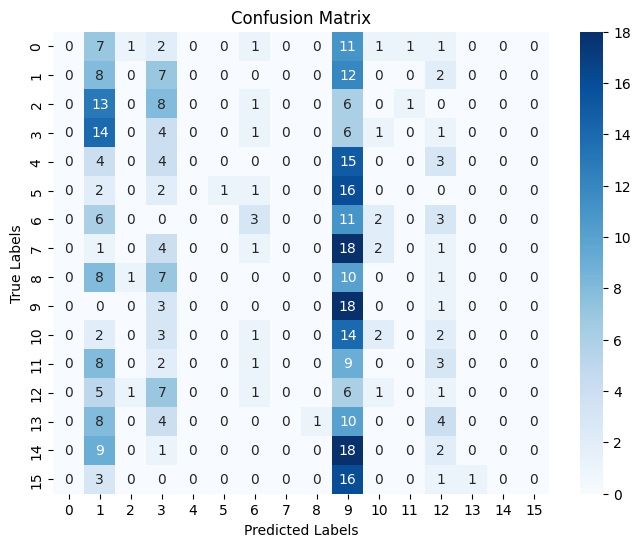

In [25]:
import seaborn as sns
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [26]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 1: TPR = 0.2759, FPR = 0.2387, TNR = 0.7613, FNR = 0.7241
Class 2: TPR = 0.0000, FPR = 0.0080, TNR = 0.9920, FNR = 1.0000
Class 3: TPR = 0.1481, FPR = 0.1425, TNR = 0.8575, FNR = 0.8519
Class 4: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 5: TPR = 0.0455, FPR = 0.0000, TNR = 1.0000, FNR = 0.9545
Class 6: TPR = 0.1200, FPR = 0.0210, TNR = 0.9790, FNR = 0.8800
Class 7: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 8: TPR = 0.0000, FPR = 0.0026, TNR = 0.9974, FNR = 1.0000
Class 9: TPR = 0.8182, FPR = 0.4635, TNR = 0.5365, FNR = 0.1818
Class 10: TPR = 0.0833, FPR = 0.0183, TNR = 0.9817, FNR = 0.9167
Class 11: TPR = 0.0000, FPR = 0.0052, TNR = 0.9948, FNR = 1.0000
Class 12: TPR = 0.0455, FPR = 0.0651, TNR = 0.9349, FNR = 0.9545
Class 13: TPR = 0.0000, FPR = 0.0026, TNR = 0.9974, FNR = 1.0000
Class 14: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 15: TPR = 0.0000, FPR = 0.000

C:\Users\harsh\AppData\Local\Temp\ipykernel_3172\3402790651.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  precision[i]= tp / (tp + fp)
C:\Users\harsh\AppData\Local\Temp\ipykernel_3172\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])


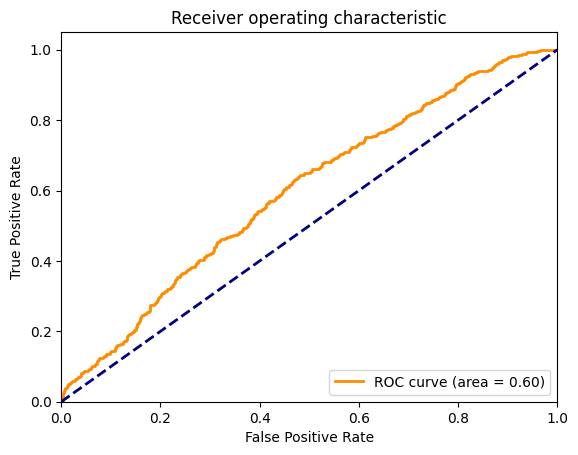

In [27]:
# Generate AUC and ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

13/13 [==============================] - 0s 35ms/step - loss: 2.7362 - accuracy: 0.0911
Test Loss: 2.736177444458008
Test Accuracy: 0.0911330059170723
13/13 [==============================] - 0s 35ms/step
AUC for class 0: 0.5460
AUC for class 1: 0.5510
AUC for class 2: 0.6785
AUC for class 3: 0.5664
AUC for class 4: 0.5357
AUC for class 5: 0.7770
AUC for class 6: 0.5791
AUC for class 7: 0.5869
AUC for class 8: 0.5235
AUC for class 9: 0.8301
AUC for class 10: 0.6325
AUC for class 11: 0.6077
AUC for class 12: 0.6252
AUC for class 13: 0.5898
AUC for class 14: 0.6251
AUC for class 15: 0.5349


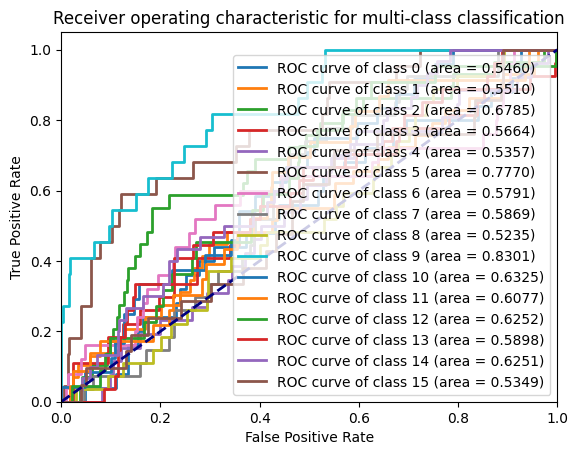

In [28]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

# 30 EPOCHS

In [29]:
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(16, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 30
batch_size = 42

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))


Epoch 1/30
29/29 [==============================] - 4s 103ms/step - loss: 2.8841 - accuracy: 0.0637 - val_loss: 2.8170 - val_accuracy: 0.0493
Epoch 2/30
29/29 [==============================] - 3s 98ms/step - loss: 2.7945 - accuracy: 0.0745 - val_loss: 2.7882 - val_accuracy: 0.0813
Epoch 3/30
29/29 [==============================] - 3s 97ms/step - loss: 2.7728 - accuracy: 0.0804 - val_loss: 2.7956 - val_accuracy: 0.0616
Epoch 4/30
29/29 [==============================] - 3s 100ms/step - loss: 2.7883 - accuracy: 0.0804 - val_loss: 2.7928 - val_accuracy: 0.0739
Epoch 5/30
29/29 [==============================] - 3s 100ms/step - loss: 2.7697 - accuracy: 0.0737 - val_loss: 2.7859 - val_accuracy: 0.0690
Epoch 6/30
29/29 [==============================] - 3s 103ms/step - loss: 2.7607 - accuracy: 0.0863 - val_loss: 2.8175 - val_accuracy: 0.0665
Epoch 7/30
29/29 [==============================] - 3s 102ms/step - loss: 2.7528 - accuracy: 0.0896 - val_loss: 2.7973 - val_accuracy: 0.0665
Epoch 8/

In [30]:
# Evaluate the RNN model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the RNN model
predictions = model.predict(x_val)

13/13 [==============================] - 1s 36ms/step - loss: 2.8038 - accuracy: 0.0862
Test Loss: 2.8037779331207275
Test Accuracy: 0.08620689809322357
13/13 [==============================] - 1s 36ms/step


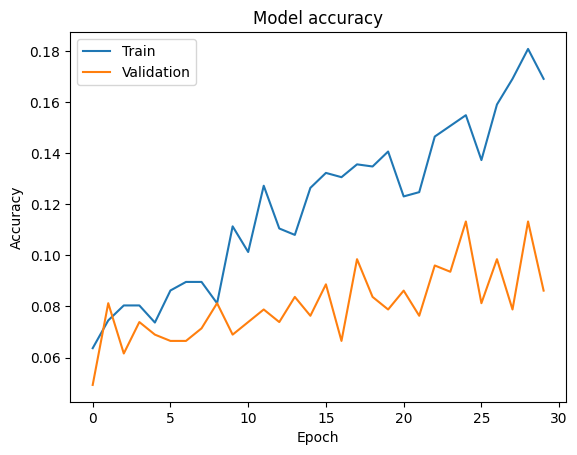

In [31]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


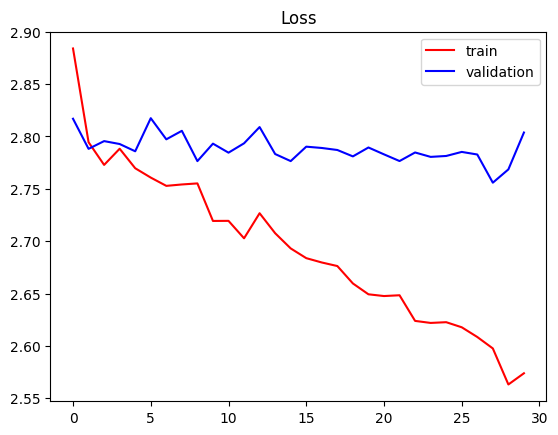

In [32]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

In [33]:
# Generate confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

13/13 [==============================] - 1s 37ms/step
Confusion Matrix:
[[ 0 11  0  0  1  0  1  3  0  8  1  0  0  0  0  0]
 [ 0  4  2  4  0  0  0  4  0 12  2  1  0  0  0  0]
 [ 0 13  3  2  0  0  1  4  0  6  0  0  0  0  0  0]
 [ 0 13  0  3  0  0  4  0  0  5  1  0  0  1  0  0]
 [ 0  8  0  1  2  0  0  0  0 12  2  0  0  1  0  0]
 [ 0  3  0  0  0  0  1  1  0 16  1  0  0  0  0  0]
 [ 0  8  0  0  1  0  2  1  0 10  3  0  0  0  0  0]
 [ 0  5  0  0  2  0  1  2  0 15  2  0  0  0  0  0]
 [ 0 11  1  0  1  0  0  3  0  9  2  0  0  0  0  0]
 [ 0  3  1  0  0  0  0  1  0 17  0  0  0  0  0  0]
 [ 0  6  2  1  0  0  1  2  0 10  2  0  0  0  0  0]
 [ 0  9  1  0  1  0  0  2  0 10  0  0  0  0  0  0]
 [ 0  3  1  7  0  0  0  2  0  5  4  0  0  0  0  0]
 [ 0  9  3  0  0  0  0  2  0  9  4  0  0  0  0  0]
 [ 0  7  2  0  1  0  0  4  0 16  0  0  0  0  0  0]
 [ 0  3  1  0  0  0  0  4  0 10  3  0  0  0  0  0]]


13/13 [==============================] - 1s 37ms/step


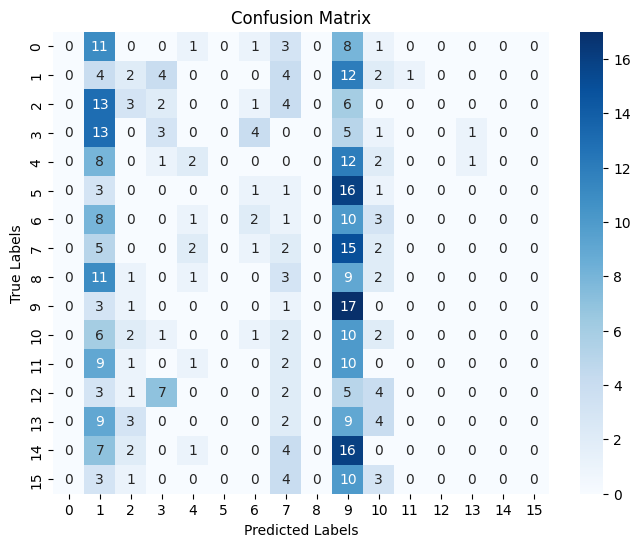

In [34]:
import seaborn as sns
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [35]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 1: TPR = 0.1379, FPR = 0.2971, TNR = 0.7029, FNR = 0.8621
Class 2: TPR = 0.1034, FPR = 0.0371, TNR = 0.9629, FNR = 0.8966
Class 3: TPR = 0.1111, FPR = 0.0396, TNR = 0.9604, FNR = 0.8889
Class 4: TPR = 0.0769, FPR = 0.0184, TNR = 0.9816, FNR = 0.9231
Class 5: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 6: TPR = 0.0800, FPR = 0.0236, TNR = 0.9764, FNR = 0.9200
Class 7: TPR = 0.0741, FPR = 0.0871, TNR = 0.9129, FNR = 0.9259
Class 8: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 9: TPR = 0.7727, FPR = 0.3984, TNR = 0.6016, FNR = 0.2273
Class 10: TPR = 0.0833, FPR = 0.0654, TNR = 0.9346, FNR = 0.9167
Class 11: TPR = 0.0000, FPR = 0.0026, TNR = 0.9974, FNR = 1.0000
Class 12: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 13: TPR = 0.0000, FPR = 0.0053, TNR = 0.9947, FNR = 1.0000
Class 14: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 15: TPR = 0.0000, FPR = 0.000

C:\Users\harsh\AppData\Local\Temp\ipykernel_3172\3402790651.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  precision[i]= tp / (tp + fp)
C:\Users\harsh\AppData\Local\Temp\ipykernel_3172\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])


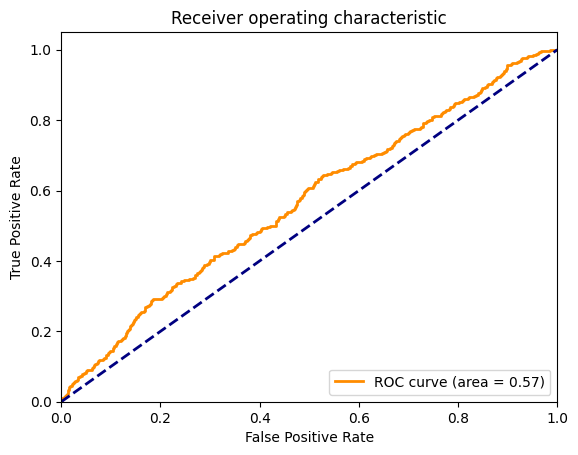

In [36]:
# Generate AUC and ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

13/13 [==============================] - 1s 36ms/step - loss: 2.8038 - accuracy: 0.0862
Test Loss: 2.8037779331207275
Test Accuracy: 0.08620689809322357
13/13 [==============================] - 0s 34ms/step
AUC for class 0: 0.5391
AUC for class 1: 0.5167
AUC for class 2: 0.6690
AUC for class 3: 0.6730
AUC for class 4: 0.5145
AUC for class 5: 0.7599
AUC for class 6: 0.4917
AUC for class 7: 0.5093
AUC for class 8: 0.5064
AUC for class 9: 0.7946
AUC for class 10: 0.5429
AUC for class 11: 0.5989
AUC for class 12: 0.5805
AUC for class 13: 0.6261
AUC for class 14: 0.5606
AUC for class 15: 0.4287


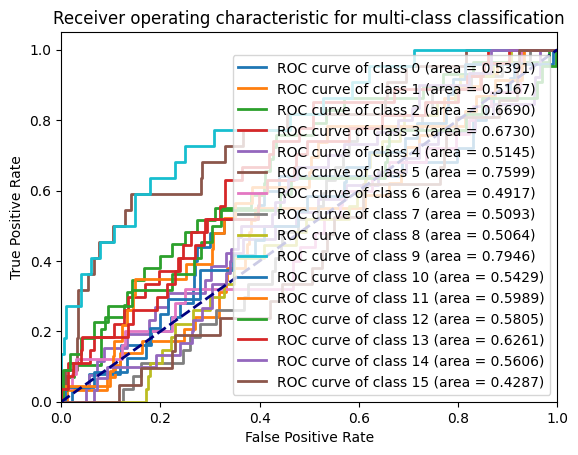

In [37]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

# EPOCH 35

In [38]:
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(16, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 35
batch_size = 42

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))


Epoch 1/35
29/29 [==============================] - 4s 102ms/step - loss: 2.8970 - accuracy: 0.0536 - val_loss: 2.7770 - val_accuracy: 0.0665
Epoch 2/35
29/29 [==============================] - 3s 97ms/step - loss: 2.7865 - accuracy: 0.0695 - val_loss: 2.8124 - val_accuracy: 0.0764
Epoch 3/35
29/29 [==============================] - 3s 97ms/step - loss: 2.7863 - accuracy: 0.0745 - val_loss: 2.7828 - val_accuracy: 0.0640
Epoch 4/35
29/29 [==============================] - 3s 101ms/step - loss: 2.7742 - accuracy: 0.0670 - val_loss: 2.7735 - val_accuracy: 0.0985
Epoch 5/35
29/29 [==============================] - 3s 102ms/step - loss: 2.7555 - accuracy: 0.0829 - val_loss: 2.7807 - val_accuracy: 0.0665
Epoch 6/35
29/29 [==============================] - 3s 103ms/step - loss: 2.7595 - accuracy: 0.0896 - val_loss: 2.7708 - val_accuracy: 0.0862
Epoch 7/35
29/29 [==============================] - 3s 104ms/step - loss: 2.7447 - accuracy: 0.0955 - val_loss: 2.7816 - val_accuracy: 0.0714
Epoch 8/

In [39]:
# Evaluate the RNN model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the RNN model
predictions = model.predict(x_val)

13/13 [==============================] - 1s 38ms/step - loss: 2.7906 - accuracy: 0.1379
Test Loss: 2.7905752658843994
Test Accuracy: 0.13793103396892548
13/13 [==============================] - 1s 37ms/step


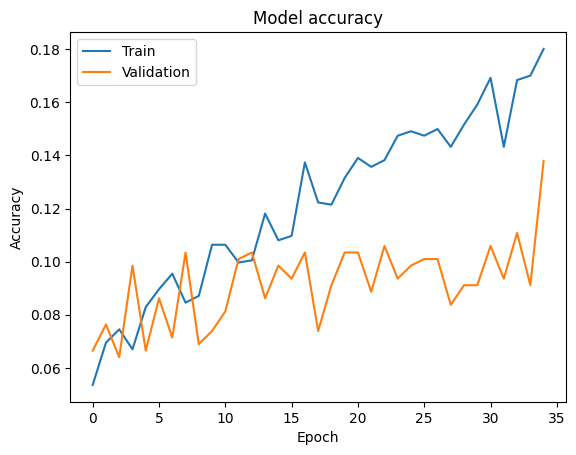

In [40]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


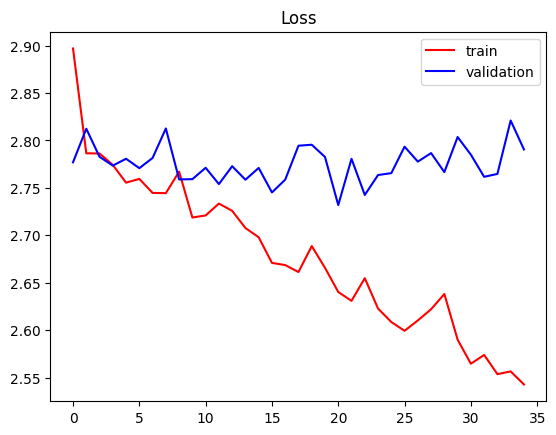

In [41]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

In [42]:
# Generate confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

13/13 [==============================] - 1s 37ms/step
Confusion Matrix:
[[ 0  0  1  3  3  4  1  0  1  0  0  5  0  0  7  0]
 [ 0  1  0  7  3  7  0  0  0  0  0  4  0  1  6  0]
 [ 0  0  1  4  3  6  2  0  0  0  0  7  0  0  6  0]
 [ 0  1  1  4  1  4  3  0  2  0  0  6  0  0  5  0]
 [ 0  0  0  4  3  7  2  0  0  0  0  2  0  0  8  0]
 [ 0  0  0  1  1 14  0  0  0  1  0  1  0  0  4  0]
 [ 0  0  0  1  4  7  3  0  0  1  0  5  0  0  4  0]
 [ 0  0  0  1  5 11  1  0  0  0  0  2  0  0  7  0]
 [ 0  0  0  7  2  2  1  0  0  0  0  5  0  0 10  0]
 [ 0  0  1  2  1 10  0  0  1  6  0  0  0  0  1  0]
 [ 0  1  0  2  5  6  1  0  0  0  0  1  0  0  8  0]
 [ 0  0  0  3  1  2  1  0  0  0  0  7  0  1  8  0]
 [ 0  1  1  8  1  2  3  0  0  0  1  0  0  0  5  0]
 [ 0  0  0  2  6  2  3  0  1  1  0  6  0  0  6  0]
 [ 0  1  1  1  2  4  0  0  0  0  0  4  0  0 17  0]
 [ 0  0  0  1  4  7  0  0  0  0  0  1  0  0  8  0]]


13/13 [==============================] - 1s 37ms/step


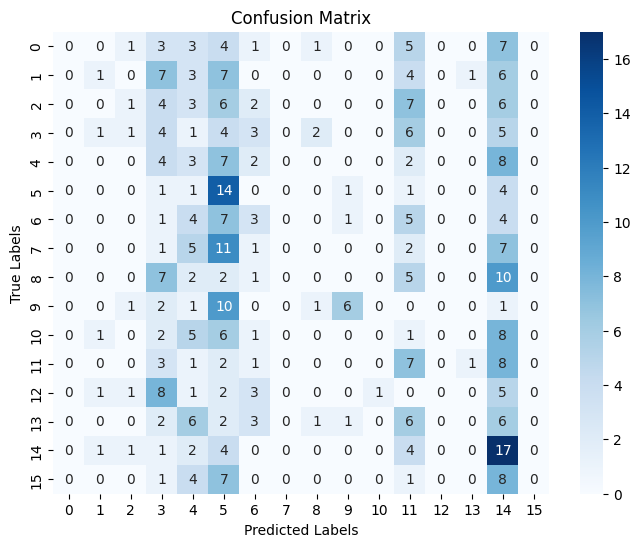

In [43]:
import seaborn as sns
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [44]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 1: TPR = 0.0345, FPR = 0.0106, TNR = 0.9894, FNR = 0.9655
Class 2: TPR = 0.0345, FPR = 0.0133, TNR = 0.9867, FNR = 0.9655
Class 3: TPR = 0.1481, FPR = 0.1240, TNR = 0.8760, FNR = 0.8519
Class 4: TPR = 0.1154, FPR = 0.1105, TNR = 0.8895, FNR = 0.8846
Class 5: TPR = 0.6364, FPR = 0.2109, TNR = 0.7891, FNR = 0.3636
Class 6: TPR = 0.1200, FPR = 0.0472, TNR = 0.9528, FNR = 0.8800
Class 7: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 8: TPR = 0.0000, FPR = 0.0132, TNR = 0.9868, FNR = 1.0000
Class 9: TPR = 0.2727, FPR = 0.0078, TNR = 0.9922, FNR = 0.7273
Class 10: TPR = 0.0000, FPR = 0.0026, TNR = 0.9974, FNR = 1.0000
Class 11: TPR = 0.3043, FPR = 0.1279, TNR = 0.8721, FNR = 0.6957
Class 12: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 13: TPR = 0.0000, FPR = 0.0053, TNR = 0.9947, FNR = 1.0000
Class 14: TPR = 0.5667, FPR = 0.2473, TNR = 0.7527, FNR = 0.4333
Class 15: TPR = 0.0000, FPR = 0.000

C:\Users\harsh\AppData\Local\Temp\ipykernel_3172\3402790651.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  precision[i]= tp / (tp + fp)
C:\Users\harsh\AppData\Local\Temp\ipykernel_3172\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])


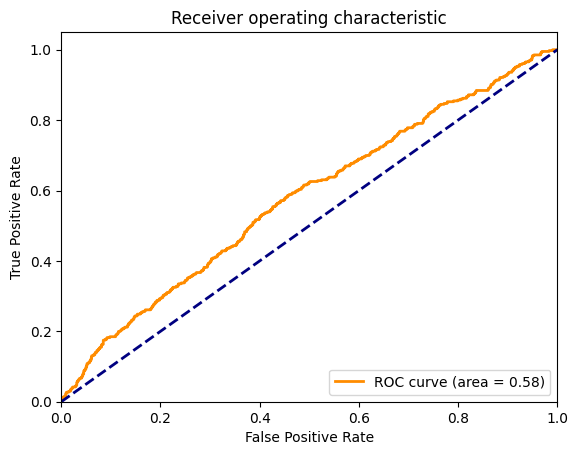

In [45]:
# Generate AUC and ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

13/13 [==============================] - 1s 37ms/step - loss: 2.7906 - accuracy: 0.1379
Test Loss: 2.7905752658843994
Test Accuracy: 0.13793103396892548
13/13 [==============================] - 1s 36ms/step
AUC for class 0: 0.5739
AUC for class 1: 0.4742
AUC for class 2: 0.6705
AUC for class 3: 0.6167
AUC for class 4: 0.5256
AUC for class 5: 0.7415
AUC for class 6: 0.5148
AUC for class 7: 0.5789
AUC for class 8: 0.5057
AUC for class 9: 0.8132
AUC for class 10: 0.5924
AUC for class 11: 0.6333
AUC for class 12: 0.4716
AUC for class 13: 0.6620
AUC for class 14: 0.6218
AUC for class 15: 0.4654


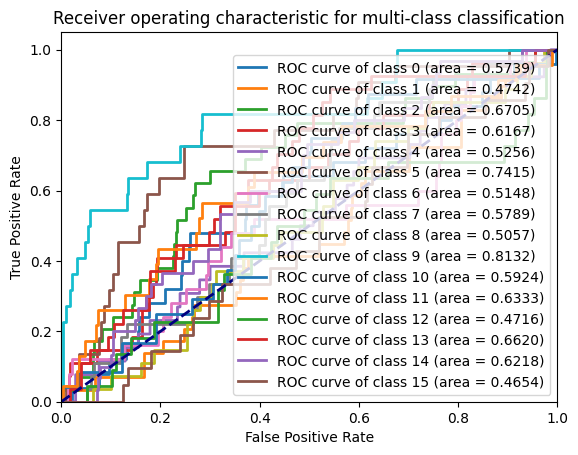

In [46]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

# 40 EPOCH

In [47]:
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(16, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 40
batch_size = 42

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))


Epoch 1/40
29/29 [==============================] - 4s 104ms/step - loss: 2.8890 - accuracy: 0.0611 - val_loss: 2.8182 - val_accuracy: 0.0665
Epoch 2/40
29/29 [==============================] - 3s 98ms/step - loss: 2.7868 - accuracy: 0.0745 - val_loss: 2.7868 - val_accuracy: 0.0690
Epoch 3/40
29/29 [==============================] - 3s 99ms/step - loss: 2.7952 - accuracy: 0.0854 - val_loss: 2.7985 - val_accuracy: 0.0788
Epoch 4/40
29/29 [==============================] - 3s 101ms/step - loss: 2.7634 - accuracy: 0.0812 - val_loss: 2.7931 - val_accuracy: 0.0640
Epoch 5/40
29/29 [==============================] - 3s 101ms/step - loss: 2.7655 - accuracy: 0.0796 - val_loss: 2.7858 - val_accuracy: 0.0739
Epoch 6/40
29/29 [==============================] - 3s 101ms/step - loss: 2.7566 - accuracy: 0.0913 - val_loss: 2.7825 - val_accuracy: 0.0764
Epoch 7/40
29/29 [==============================] - 3s 99ms/step - loss: 2.7318 - accuracy: 0.1005 - val_loss: 2.7731 - val_accuracy: 0.0788
Epoch 8/4

In [48]:
# Evaluate the RNN model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the RNN model
predictions = model.predict(x_val)

13/13 [==============================] - 1s 37ms/step - loss: 2.8310 - accuracy: 0.0640
Test Loss: 2.830977201461792
Test Accuracy: 0.06403940916061401
13/13 [==============================] - 1s 38ms/step


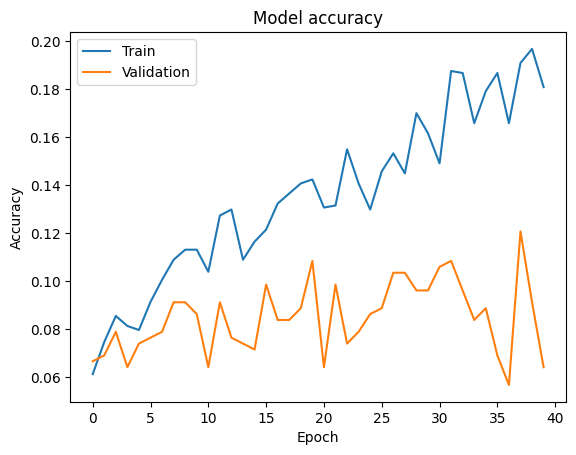

In [49]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


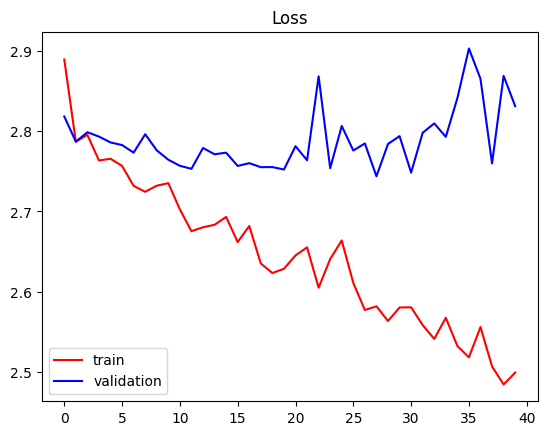

In [50]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

In [51]:
# Generate confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

13/13 [==============================] - 1s 38ms/step
Confusion Matrix:
[[ 1 12  1  0  0  0  2  0  2  0  0  6  0  1  0  0]
 [ 0 10  2  0  0  0  4  1  0  0  0  6  0  6  0  0]
 [ 3 16  2  0  0  0  1  2  0  0  0  4  0  1  0  0]
 [ 1 14  0  0  0  0  4  0  0  0  0  4  1  3  0  0]
 [ 0 17  0  1  1  0  2  1  0  0  0  0  0  4  0  0]
 [ 0  7  0  0  1  0  1  9  0  0  0  2  0  2  0  0]
 [ 0 13  0  0  0  1  2  4  0  0  1  1  0  3  0  0]
 [ 0 11  0  0  0  0  1  2  0  0  1  5  0  7  0  0]
 [ 0 15  1  0  1  0  2  2  0  0  0  4  0  2  0  0]
 [ 1  7  1  0  0  0  0 12  0  0  0  0  0  1  0  0]
 [ 0 12  1  1  0  0  3  0  0  0  1  1  0  5  0  0]
 [ 0 12  0  0  0  0  2  0  0  0  0  3  0  6  0  0]
 [ 1  5  1  3  1  0  4  0  0  0  1  1  0  4  1  0]
 [ 0 11  2  1  1  0  1  0  0  0  1  5  1  4  0  0]
 [ 1 17  1  0  0  0  0  3  0  0  0  6  0  2  0  0]
 [ 3 12  0  0  0  0  0  2  0  0  0  1  0  3  0  0]]


13/13 [==============================] - 1s 39ms/step


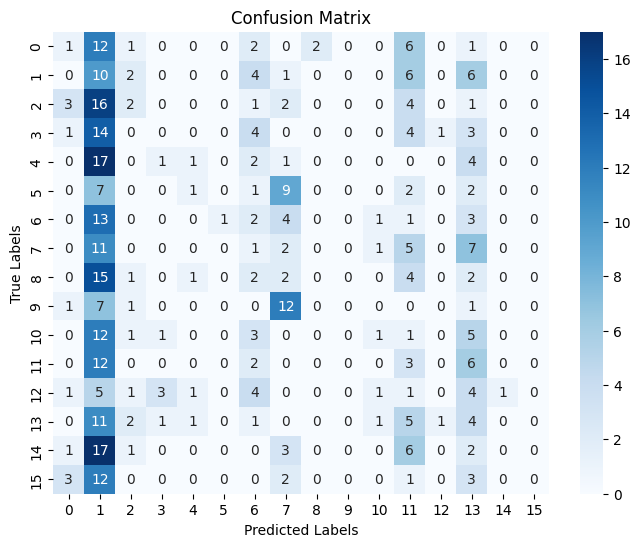

In [52]:
import seaborn as sns
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [53]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.0400, FPR = 0.0262, TNR = 0.9738, FNR = 0.9600
Class 1: TPR = 0.3448, FPR = 0.4801, TNR = 0.5199, FNR = 0.6552
Class 2: TPR = 0.0690, FPR = 0.0265, TNR = 0.9735, FNR = 0.9310
Class 3: TPR = 0.0000, FPR = 0.0158, TNR = 0.9842, FNR = 1.0000
Class 4: TPR = 0.0385, FPR = 0.0105, TNR = 0.9895, FNR = 0.9615
Class 5: TPR = 0.0000, FPR = 0.0026, TNR = 0.9974, FNR = 1.0000
Class 6: TPR = 0.0800, FPR = 0.0709, TNR = 0.9291, FNR = 0.9200
Class 7: TPR = 0.0741, FPR = 0.0950, TNR = 0.9050, FNR = 0.9259
Class 8: TPR = 0.0000, FPR = 0.0053, TNR = 0.9947, FNR = 1.0000
Class 9: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 10: TPR = 0.0417, FPR = 0.0105, TNR = 0.9895, FNR = 0.9583
Class 11: TPR = 0.1304, FPR = 0.1201, TNR = 0.8799, FNR = 0.8696
Class 12: TPR = 0.0000, FPR = 0.0052, TNR = 0.9948, FNR = 1.0000
Class 13: TPR = 0.1481, FPR = 0.1319, TNR = 0.8681, FNR = 0.8519
Class 14: TPR = 0.0000, FPR = 0.0027, TNR = 0.9973, FNR = 1.0000
Class 15: TPR = 0.0000, FPR = 0.000

C:\Users\harsh\AppData\Local\Temp\ipykernel_3172\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])
C:\Users\harsh\AppData\Local\Temp\ipykernel_3172\3402790651.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  precision[i]= tp / (tp + fp)


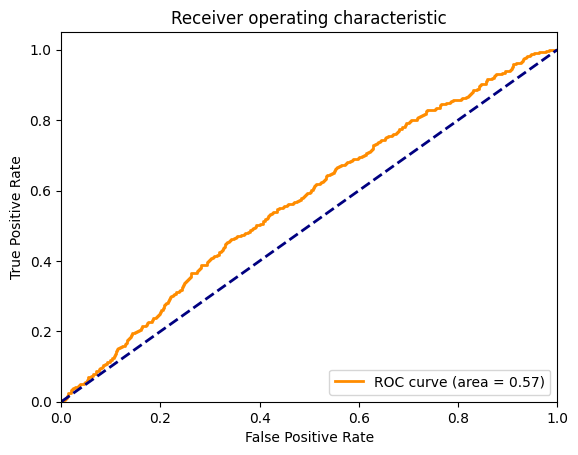

In [54]:
# Generate AUC and ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

13/13 [==============================] - 1s 51ms/step - loss: 2.8310 - accuracy: 0.0640
Test Loss: 2.830977201461792
Test Accuracy: 0.06403940916061401
13/13 [==============================] - 1s 49ms/step
AUC for class 0: 0.5041
AUC for class 1: 0.4591
AUC for class 2: 0.6646
AUC for class 3: 0.4426
AUC for class 4: 0.4726
AUC for class 5: 0.7433
AUC for class 6: 0.5260
AUC for class 7: 0.5736
AUC for class 8: 0.4542
AUC for class 9: 0.8242
AUC for class 10: 0.5276
AUC for class 11: 0.6334
AUC for class 12: 0.5437
AUC for class 13: 0.5058
AUC for class 14: 0.6215
AUC for class 15: 0.5630


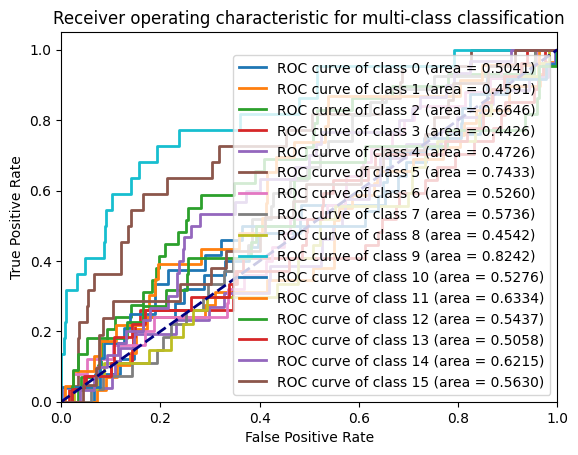

In [55]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

# 80 EPOCH

In [60]:
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(16, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 80
batch_size = 42

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))


Epoch 1/80
25/25 [==============================] - 4s 132ms/step - loss: 2.8755 - accuracy: 0.0581 - val_loss: 2.7855 - val_accuracy: 0.0669
Epoch 2/80
25/25 [==============================] - 3s 120ms/step - loss: 2.7857 - accuracy: 0.0795 - val_loss: 2.7737 - val_accuracy: 0.0739
Epoch 3/80
25/25 [==============================] - 3s 122ms/step - loss: 2.7662 - accuracy: 0.0785 - val_loss: 2.7716 - val_accuracy: 0.0599
Epoch 4/80
25/25 [==============================] - 3s 119ms/step - loss: 2.7457 - accuracy: 0.0901 - val_loss: 2.7669 - val_accuracy: 0.0739
Epoch 5/80
25/25 [==============================] - 3s 119ms/step - loss: 2.7324 - accuracy: 0.1037 - val_loss: 2.7728 - val_accuracy: 0.0898
Epoch 6/80
25/25 [==============================] - 3s 121ms/step - loss: 2.7326 - accuracy: 0.0872 - val_loss: 2.7394 - val_accuracy: 0.0880
Epoch 7/80
25/25 [==============================] - 3s 125ms/step - loss: 2.7112 - accuracy: 0.1095 - val_loss: 2.7512 - val_accuracy: 0.0827
Epoch 

In [61]:
# Evaluate the RNN model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the RNN model
predictions = model.predict(x_val)

18/18 [==============================] - 1s 39ms/step - loss: 3.1456 - accuracy: 0.0880
Test Loss: 3.1456172466278076
Test Accuracy: 0.08802817016839981
18/18 [==============================] - 1s 39ms/step


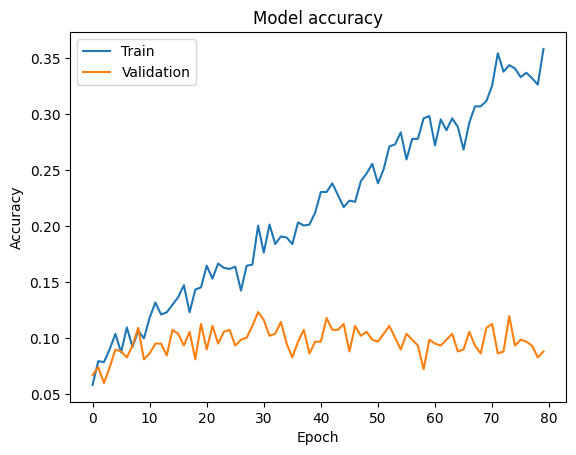

In [62]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


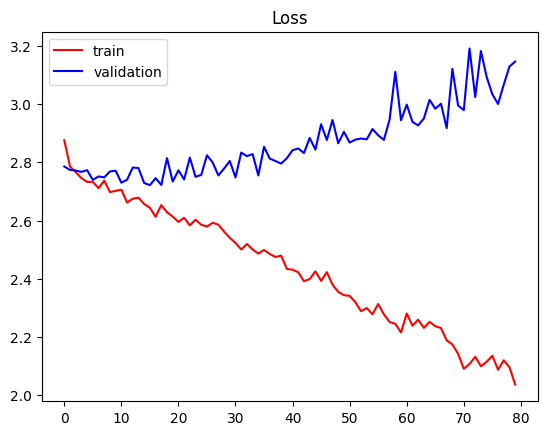

In [63]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

In [64]:
# Generate confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

18/18 [==============================] - 1s 39ms/step
Confusion Matrix:
[[ 5  0  4  1  1  0  1  3  8  5  1  0  3  1  0  0]
 [10  0  3  4  0  0  1  2  9  2  0  1  1  3  0  1]
 [ 8  2  2  1  0  0  1  3  8  4  0  1  2  1  0  1]
 [ 4  1  2  3  1  0  3  3  8  2  3  0  1  1  0  5]
 [ 8  1  2  2  0  1  4  2  4  5  1  1  1  1  0  1]
 [ 3  0  0  1  0  1  1  3  3 16  1  0  1  1  0  2]
 [ 7  2  1  2  0  0  5  1  8 10  2  0  3  2  1  2]
 [ 8  2  2  0  0  0  1  3  6  8  3  0  0  0  0  1]
 [ 9  0  5  1  0  0  4  1 10  2  0  1  1  0  1  1]
 [ 0  1  4  0  0  0  1  2  2 19  3  0  0  0  0  1]
 [ 9  0  2  1  0  1  2  6  6  6  0  1  1  2  0  0]
 [ 7  1  2  1  1  0  2  3 10  4  0  0  0  0  0  3]
 [12  0  2  0  0  0  2  6  2  4  2  0  0  1  0  1]
 [12  1  0  0  0  1  3  2  5  2  3  2  2  1  0  1]
 [ 6  0  1  0  0  0  2  9  5  4  1  1  1  2  0  1]
 [ 8  1  1  3  0  0  3  4  7  7  2  1  2  0  0  1]]


18/18 [==============================] - 1s 40ms/step


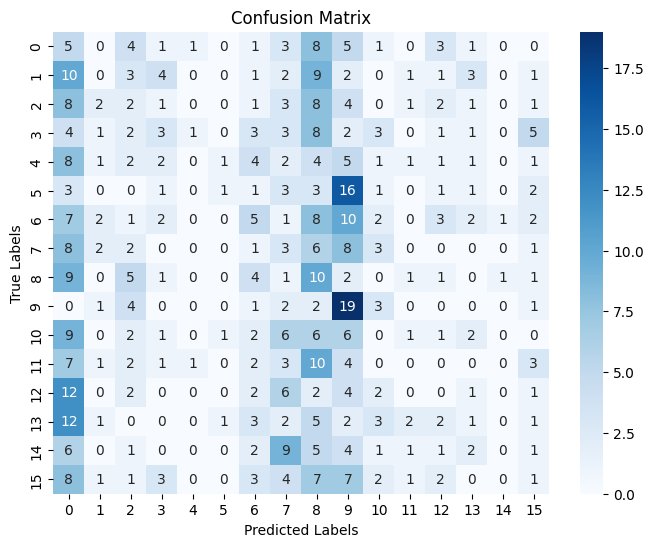

In [65]:
import seaborn as sns
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [66]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.1515, FPR = 0.2075, TNR = 0.7925, FNR = 0.8485
Class 1: TPR = 0.0000, FPR = 0.0226, TNR = 0.9774, FNR = 1.0000
Class 2: TPR = 0.0588, FPR = 0.0581, TNR = 0.9419, FNR = 0.9412
Class 3: TPR = 0.0811, FPR = 0.0320, TNR = 0.9680, FNR = 0.9189
Class 4: TPR = 0.0000, FPR = 0.0056, TNR = 0.9944, FNR = 1.0000
Class 5: TPR = 0.0303, FPR = 0.0056, TNR = 0.9944, FNR = 0.9697
Class 6: TPR = 0.1087, FPR = 0.0594, TNR = 0.9406, FNR = 0.8913
Class 7: TPR = 0.0882, FPR = 0.0936, TNR = 0.9064, FNR = 0.9118
Class 8: TPR = 0.2778, FPR = 0.1711, TNR = 0.8289, FNR = 0.7222
Class 9: TPR = 0.5758, FPR = 0.1514, TNR = 0.8486, FNR = 0.4242
Class 10: TPR = 0.0000, FPR = 0.0414, TNR = 0.9586, FNR = 1.0000
Class 11: TPR = 0.0000, FPR = 0.0169, TNR = 0.9831, FNR = 1.0000
Class 12: TPR = 0.0000, FPR = 0.0354, TNR = 0.9646, FNR = 1.0000
Class 13: TPR = 0.0286, FPR = 0.0281, TNR = 0.9719, FNR = 0.9714
Class 14: TPR = 0.0000, FPR = 0.0037, TNR = 0.9963, FNR = 1.0000
Class 15: TPR = 0.0250, FPR = 0.039

C:\Users\harsh\AppData\Local\Temp\ipykernel_11320\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])


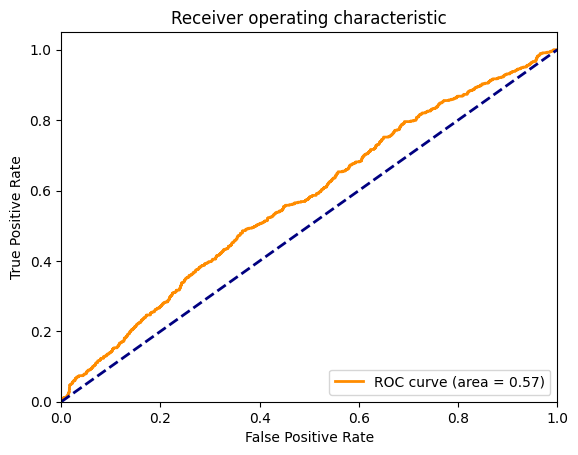

In [67]:
# Generate AUC and ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

18/18 [==============================] - 1s 39ms/step - loss: 3.1456 - accuracy: 0.0880
Test Loss: 3.1456172466278076
Test Accuracy: 0.08802817016839981
18/18 [==============================] - 1s 39ms/step
AUC for class 0: 0.4835
AUC for class 1: 0.5055
AUC for class 2: 0.4584
AUC for class 3: 0.5378
AUC for class 4: 0.4968
AUC for class 5: 0.7226
AUC for class 6: 0.5641
AUC for class 7: 0.6191
AUC for class 8: 0.5789
AUC for class 9: 0.8391
AUC for class 10: 0.4581
AUC for class 11: 0.5399
AUC for class 12: 0.5599
AUC for class 13: 0.5720
AUC for class 14: 0.5911
AUC for class 15: 0.5375


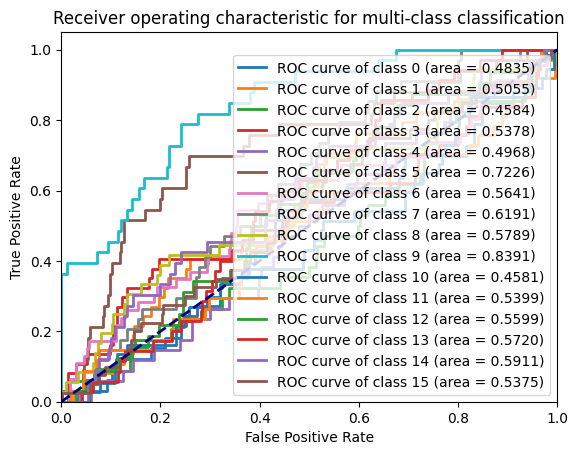

In [68]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()